# Color compression of an image with K-Means Clustering Algorithm

### loading of libraries

In [1]:
!git clone https://github.com/niazwazir/TestImage.git

Cloning into 'TestImage'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 33 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (33/33), done.


In [0]:
import numpy as np
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from time import time

(400, 400, 3)


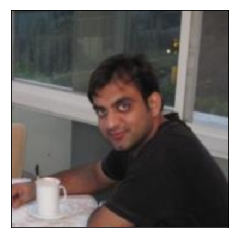

In [3]:
china=io.imread('TestImage/man.jpg')
china1=io.imread('TestImage/man.jpg')
china=cv2.resize(china,(400,400))
plt.xticks([])
plt.yticks([])
plt.imshow(china)
print (china.shape)
plt.show()

In [4]:
data=china.reshape(-1,3)
data.shape

(160000, 3)

In [5]:
km=KMeans(n_clusters=10)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
dominant_colors=km.cluster_centers_.astype(np.uint8)

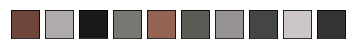

In [8]:
plt.figure(0)

for i in range(dominant_colors.shape[0]):
    plt.subplot(1,dominant_colors.shape[0],i+1)
    plt.xticks([])
    plt.yticks([])
    col=np.zeros((100,100,3),dtype=np.uint8)
    col[:,:,:]=dominant_colors[i]
    plt.imshow(col)

In [9]:
new_image=np.zeros_like(data)
labels=km.predict(data)
print (np.unique(labels,return_counts=False))

[0 1 2 3 4 5 6 7 8 9]


In [0]:
for ix in range(len(new_image)):
    new_image[ix,:]=dominant_colors[labels[ix]]
    

In [0]:
figsize=(16,6))

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


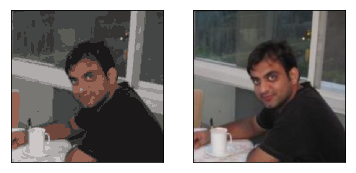

In [12]:
#new image
plt.subplot(1, 2, 1)
plt.grid("off")
plt.xticks([])
plt.yticks([])
plt.imshow(new_image.reshape(china.shape))

#actual image
plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.imshow(china)

Fitting model on a small sub-sample of the data
done in 0.141s.
Predicting color indices on the full image (k-means)
done in 0.067s.
Predicting color indices on the full image (random)
done in 0.069s.


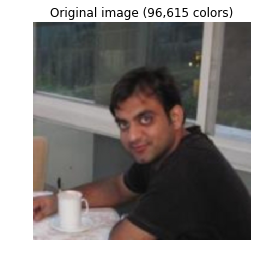

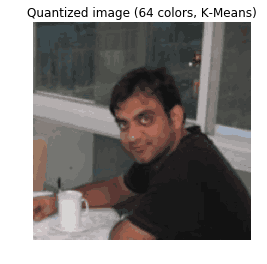

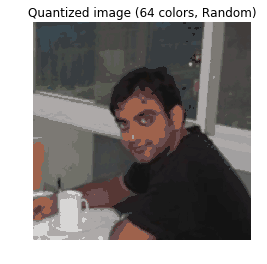

In [13]:
n_colors = 32
# Load the  photo
#china = load_sample_image('baby_x2_GT.png')

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

(400, 400, 3)


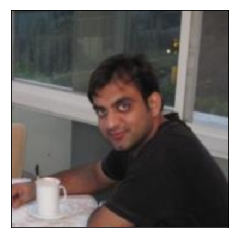

In [14]:
china1=cv2.resize(china1,(400,400))
plt.xticks([])
plt.yticks([])
plt.imshow(china1)
print (china1.shape)
plt.show()

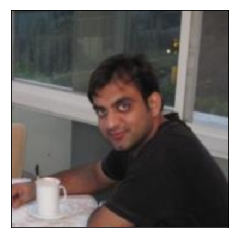

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.datasets import load_sample_image
#china = load_sample_image(r'C:\dataset\me.jpg')
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(china1)


### dimensions of array

In [18]:
china1.shape

(400, 400, 3)

### reshaping the data to n_samples by n_features and rescaling the colors so that they lie between 0 and 1

In [19]:
data = china1/255.0 # use 0...1 scale
data = data.reshape(400*400,3)
data.shape

(160000, 3)

### visualizing these pixels in this color space, using a subset of 10,000 pixels for efficiency

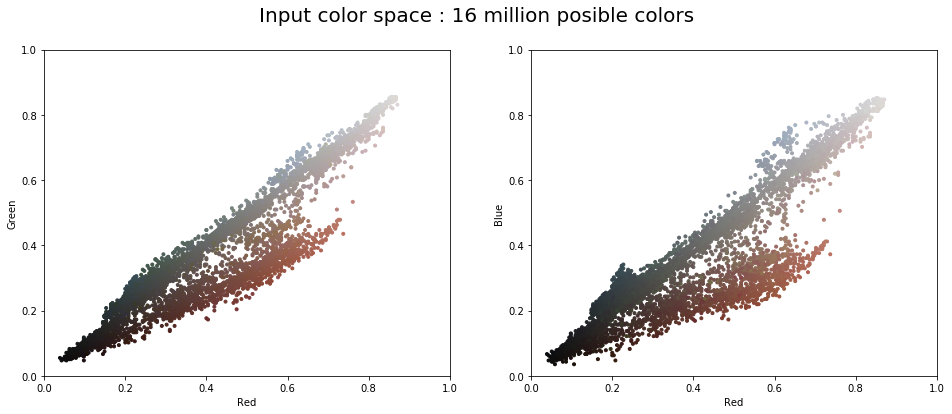

In [20]:
def plot_pixels(data,title,colors=None,N=10000):
        if colors is None:
            colors = data
        # choose a random subset
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R,G,B = data[i].T
        
        fig,ax = plt.subplots(1,2,figsize=(16,6))
        ax[0].scatter(R,G,color=colors,marker='.')
        ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
        
        ax[1].scatter(R,B,color=colors,marker='.')
        ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
        
        fig.suptitle(title,size=20)
        
plot_pixels(data,title="Input color space : 16 million posible colors")


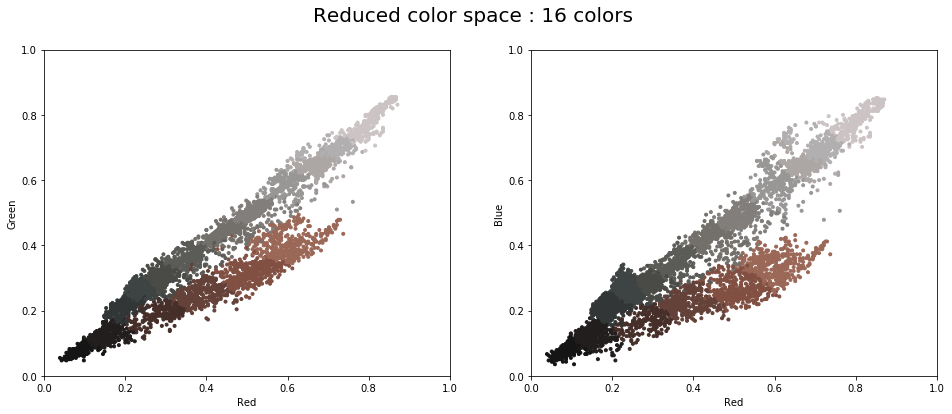

In [21]:
import warnings
#warnings.simplefilter('ignore') # fix numpy issues
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,title="Reduced color space : 16 colors ",colors=new_colors)

Text(0.5, 1.0, '16-color Image')

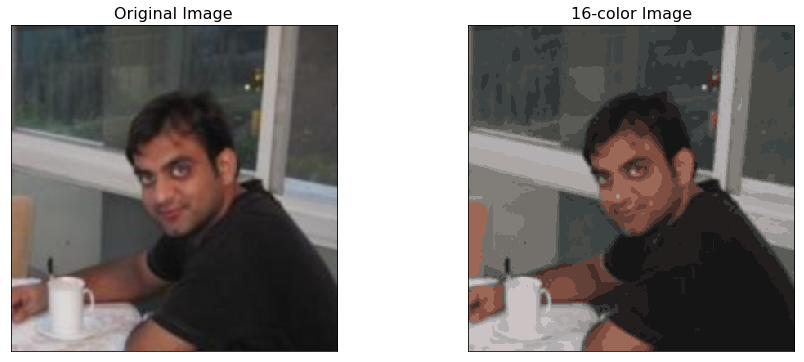

In [22]:
china_recolored = new_colors.reshape(china1.shape)

fig,ax = plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china1)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image',size=16)